In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e24/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv")
sub = pd.read_csv("/kaggle/input/playground-series-s3e24/sample_submission.csv")

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

In [4]:
test

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [5]:
train

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [6]:
def con_cat(train, test):
    df1, df2 = train.copy(), test.copy()
    df1["group"] = "train"
    df2["group"] = "test"

    return pd.concat([df1, df2], axis=0, ignore_index=True)


df = con_cat(train, test)

In [7]:
df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,group
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,75,16.5,1,1.0,22,25,27,0,1.0,train
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,126,16.2,1,1.1,27,23,37,1,0.0,train
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,93,17.4,1,0.8,27,31,53,0,1.0,train
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,102,15.9,1,1.0,20,27,30,1,0.0,train
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,93,15.4,1,0.8,19,13,17,0,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265422,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,149,16.4,1,1.1,24,31,28,0,NaN,test
265423,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,100,16.0,2,1.0,25,31,38,0,NaN,test
265424,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,142,15.9,1,0.8,33,32,24,1,NaN,test
265425,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,103,13.9,1,0.6,42,36,32,0,NaN,test


In [8]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,group
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,75,16.5,1,1.0,22,25,27,0,1.0,train
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,126,16.2,1,1.1,27,23,37,1,0.0,train
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,93,17.4,1,0.8,27,31,53,0,1.0,train
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,102,15.9,1,1.0,20,27,30,1,0.0,train
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,93,15.4,1,0.8,19,13,17,0,1.0,train


In [9]:
df.isnull().sum()

id                          0
age                         0
height(cm)                  0
weight(kg)                  0
waist(cm)                   0
eyesight(left)              0
eyesight(right)             0
hearing(left)               0
hearing(right)              0
systolic                    0
relaxation                  0
fasting blood sugar         0
Cholesterol                 0
triglyceride                0
HDL                         0
LDL                         0
hemoglobin                  0
Urine protein               0
serum creatinine            0
AST                         0
ALT                         0
Gtp                         0
dental caries               0
smoking                106171
group                       0
dtype: int64

In [10]:
columns_to_drop = ['id']
df = df.drop(columns=columns_to_drop)

In [11]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in df.columns if
                   df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
 
    
    return cat_cols, num_cols, cat_but_car



cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 265427
Variables: 24
cat_cols: 6
num_cols: 18
cat_but_car: 0
num_but_cat: 5


In [12]:
cat_cols

['group',
 'hearing(left)',
 'hearing(right)',
 'Urine protein',
 'dental caries',
 'smoking']

In [13]:
num_cols

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp']

In [14]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,...,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,159256.000000
mean,44.354591,165.248686,67.136444,83.001151,1.005389,1.000387,1.024071,1.023645,122.492350,76.852713,...,55.880525,114.603571,14.795521,1.073659,0.892644,25.533958,26.556349,36.164358,0.196981,0.437365
std,11.864380,8.826224,12.586326,8.953381,0.400349,0.389693,0.153269,0.151941,12.743802,9.004327,...,13.978732,27.679074,1.432445,0.345058,0.179578,9.480731,17.829734,31.094341,0.397718,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.700000,9.900000,9.900000,2.000000,2.000000,213.000000,140.000000,...,148.000000,1860.000000,21.100000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [15]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
check_outlier(df, num_cols)

True

In [16]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

In [17]:
check_outlier(df, num_cols)

False

In [18]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,...,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,159256.000000
mean,44.354591,165.248686,67.136444,83.001151,0.999808,0.995466,1.024071,1.023645,122.492316,76.852698,...,55.880525,114.536251,14.795533,1.073659,0.892479,25.473083,26.472190,35.789639,0.196981,0.437365
std,11.864380,8.826224,12.586326,8.953381,0.315446,0.313434,0.153269,0.151941,12.743567,9.004224,...,13.978732,26.006776,1.432364,0.345058,0.176060,8.387380,14.927725,27.337904,0.397718,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,9.000000,1.000000,5.800000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.700000,3.000000,3.000000,2.000000,2.000000,208.500000,136.000000,...,148.000000,281.500000,21.100000,6.000000,2.100000,78.500000,121.000000,199.500000,1.000000,1.000000


In [19]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [20]:
for col in cat_cols:
    cat_summary(df, col)

        group      Ratio
group                   
train  159256  59.999925
test   106171  40.000075
##########################################
               hearing(left)      Ratio
hearing(left)                          
1                     259038  97.592935
2                       6389   2.407065
##########################################
                hearing(right)      Ratio
hearing(right)                           
1                       259151  97.635508
2                         6276   2.364492
##########################################
               Urine protein      Ratio
Urine protein                          
1                     251449  94.733769
2                       9441   3.556910
3                       3630   1.367608
4                        786   0.296127
5                        113   0.042573
6                          8   0.003014
##########################################
               dental caries      Ratio
dental caries                          


In [21]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    265427.000000
mean         44.354591
std          11.864380
min          20.000000
5%           25.000000
10%          30.000000
20%          35.000000
30%          40.000000
40%          40.000000
50%          40.000000
60%          45.000000
70%          50.000000
80%          55.000000
90%          60.000000
95%          65.000000
99%          75.000000
max          85.000000
Name: age, dtype: float64


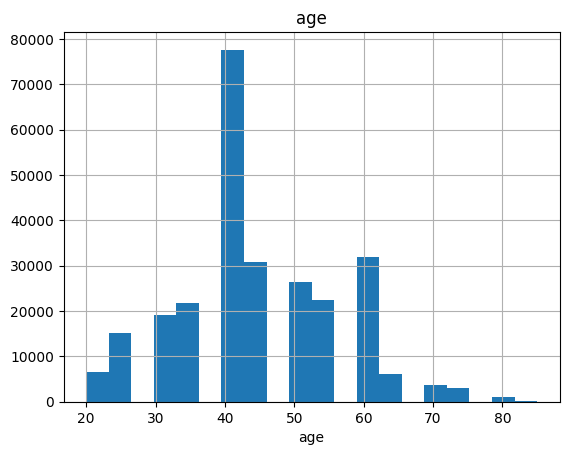

count    265427.000000
mean        165.248686
std           8.826224
min         135.000000
5%          150.000000
10%         155.000000
20%         155.000000
30%         160.000000
40%         165.000000
50%         165.000000
60%         170.000000
70%         170.000000
80%         175.000000
90%         175.000000
95%         180.000000
99%         180.000000
max         190.000000
Name: height(cm), dtype: float64


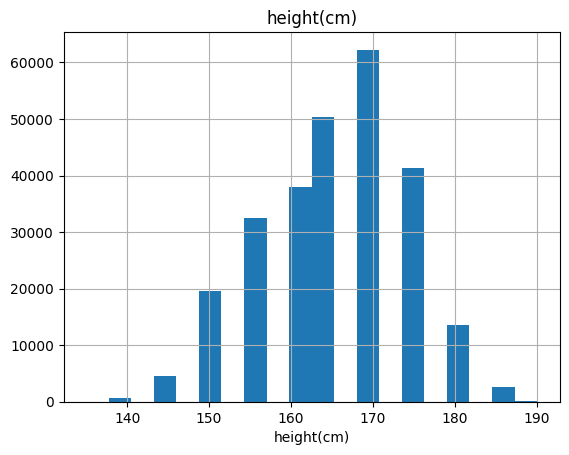

count    265427.000000
mean         67.136444
std          12.586326
min          30.000000
5%           50.000000
10%          50.000000
20%          55.000000
30%          60.000000
40%          65.000000
50%          65.000000
60%          70.000000
70%          75.000000
80%          75.000000
90%          85.000000
95%          90.000000
99%         100.000000
max         130.000000
Name: weight(kg), dtype: float64


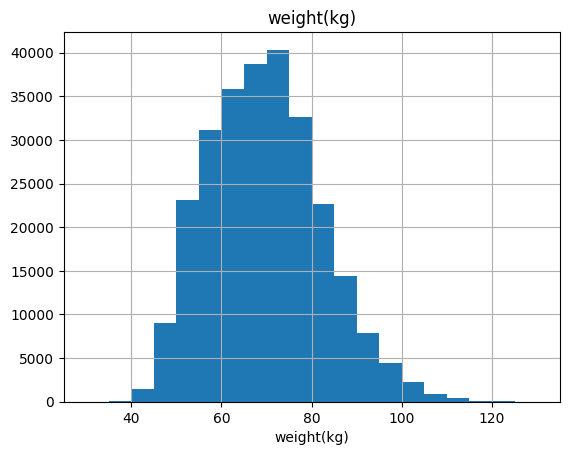

count    265427.000000
mean         83.001151
std           8.953381
min          51.000000
5%           68.000000
10%          71.000000
20%          75.000000
30%          78.100000
40%          81.000000
50%          83.000000
60%          85.000000
70%          88.000000
80%          90.000000
90%          94.100000
95%          98.000000
99%         104.000000
max         127.700000
Name: waist(cm), dtype: float64


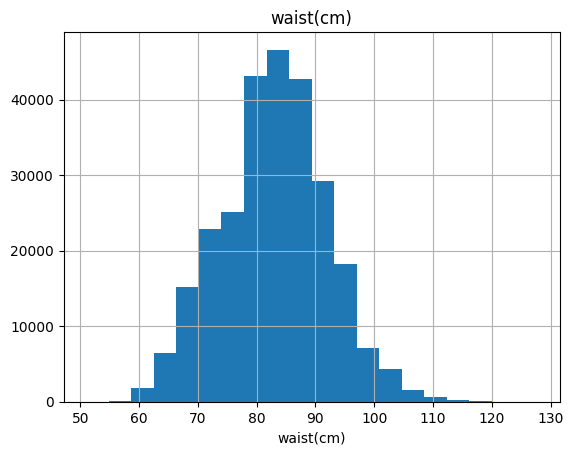

count    265427.000000
mean          0.999808
std           0.315446
min           0.100000
5%            0.500000
10%           0.600000
20%           0.700000
30%           0.800000
40%           1.000000
50%           1.000000
60%           1.000000
70%           1.200000
80%           1.200000
90%           1.500000
95%           1.500000
99%           1.500000
max           3.000000
Name: eyesight(left), dtype: float64


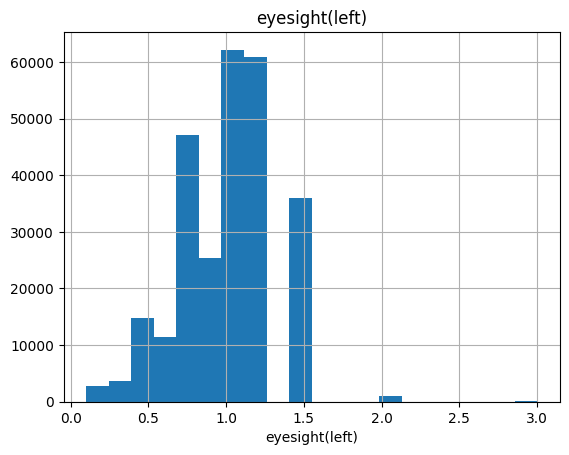

count    265427.000000
mean          0.995466
std           0.313434
min           0.100000
5%            0.500000
10%           0.600000
20%           0.700000
30%           0.800000
40%           1.000000
50%           1.000000
60%           1.000000
70%           1.200000
80%           1.200000
90%           1.500000
95%           1.500000
99%           1.500000
max           3.000000
Name: eyesight(right), dtype: float64


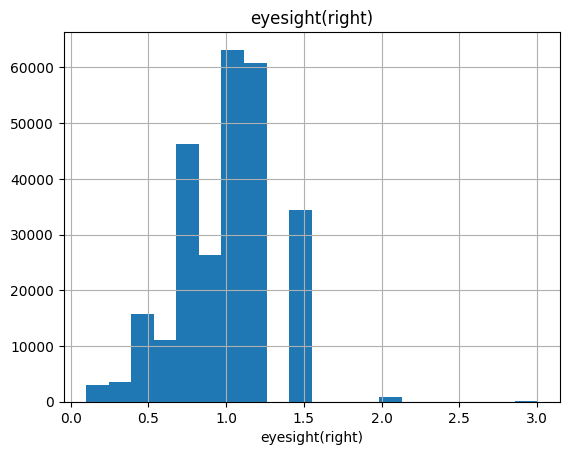

count    265427.000000
mean        122.492316
std          12.743567
min          71.000000
5%          101.000000
10%         107.000000
20%         110.000000
30%         116.000000
40%         119.000000
50%         121.000000
60%         126.000000
70%         130.000000
80%         133.000000
90%         138.000000
95%         144.000000
99%         154.000000
max         208.500000
Name: systolic, dtype: float64


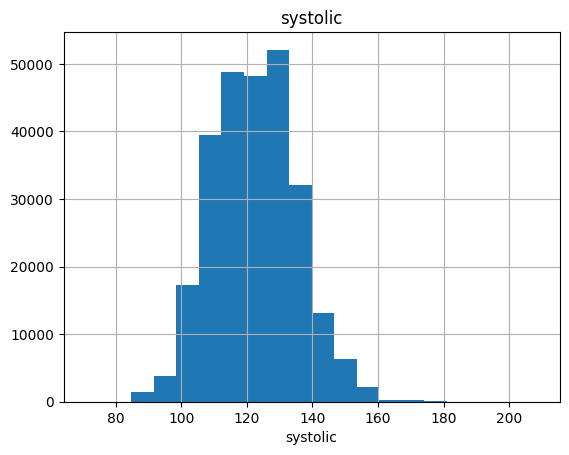

count    265427.000000
mean         76.852698
std           9.004224
min          40.000000
5%           61.000000
10%          65.000000
20%          70.000000
30%          71.000000
40%          74.000000
50%          78.000000
60%          80.000000
70%          80.000000
80%          84.000000
90%          88.000000
95%          91.000000
99%         100.000000
max         136.000000
Name: relaxation, dtype: float64


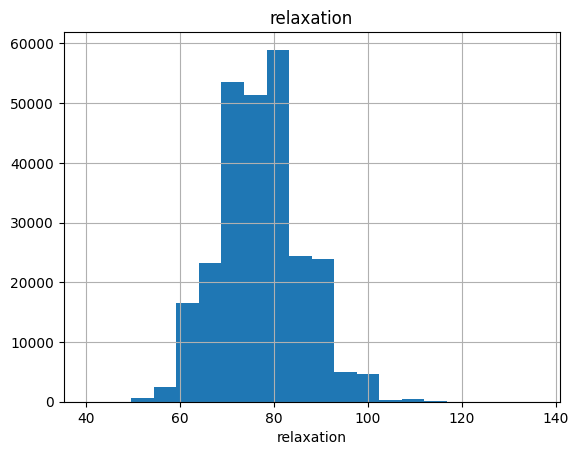

count    265427.000000
mean         98.217549
std          14.089275
min          46.000000
5%           81.000000
10%          84.000000
20%          88.000000
30%          91.000000
40%          94.000000
50%          96.000000
60%          98.000000
70%         102.000000
80%         106.000000
90%         114.000000
95%         122.000000
99%         152.000000
max         183.500000
Name: fasting blood sugar, dtype: float64


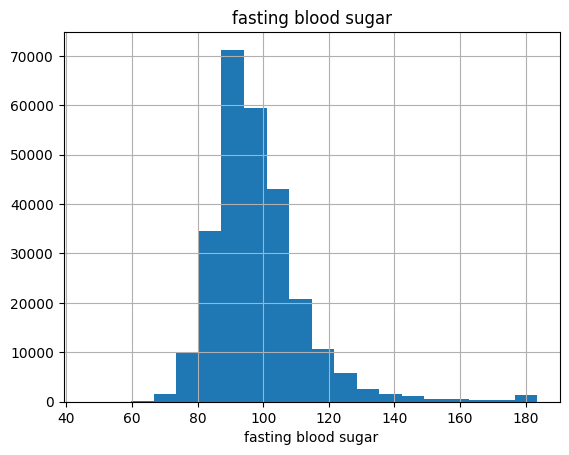

count    265427.000000
mean        195.827388
std          28.411870
min          66.000000
5%          150.000000
10%         157.000000
20%         170.000000
30%         180.000000
40%         188.000000
50%         196.000000
60%         204.000000
70%         213.000000
80%         221.000000
90%         231.000000
95%         240.000000
99%         260.000000
max         375.000000
Name: Cholesterol, dtype: float64


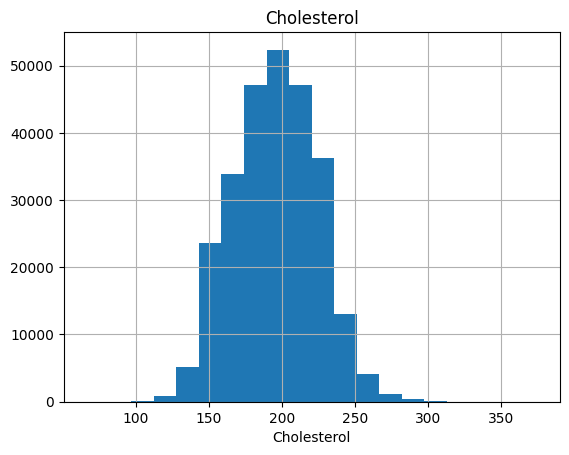

count    265427.000000
mean        127.531376
std          66.248406
min           8.000000
5%           44.000000
10%          53.000000
20%          70.000000
30%          83.000000
40%          97.000000
50%         115.000000
60%         135.000000
70%         155.000000
80%         179.000000
90%         217.000000
95%         255.000000
99%         330.000000
max         571.500000
Name: triglyceride, dtype: float64


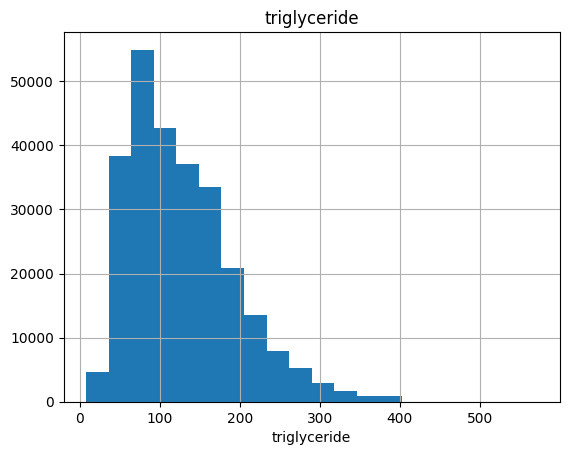

count    265427.000000
mean         55.880525
std          13.978732
min           9.000000
5%           37.000000
10%          40.000000
20%          44.000000
30%          47.000000
40%          50.000000
50%          54.000000
60%          57.000000
70%          62.000000
80%          67.000000
90%          76.000000
95%          83.000000
99%          94.000000
max         148.000000
Name: HDL, dtype: float64


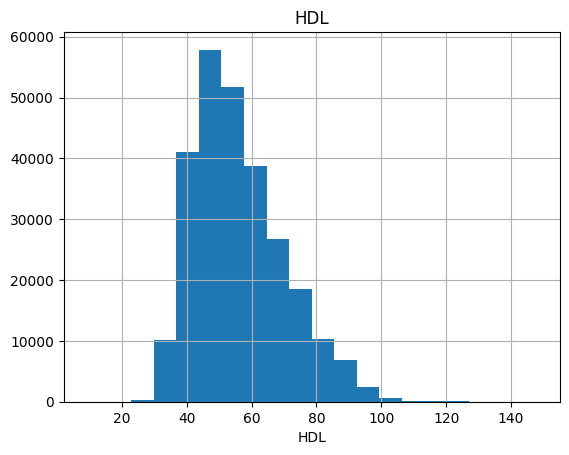

count    265427.000000
mean        114.536251
std          26.006776
min           1.000000
5%           74.000000
10%          81.000000
20%          91.000000
30%          99.000000
40%         107.000000
50%         114.000000
60%         122.000000
70%         129.000000
80%         138.000000
90%         148.000000
95%         157.000000
99%         174.000000
max         281.500000
Name: LDL, dtype: float64


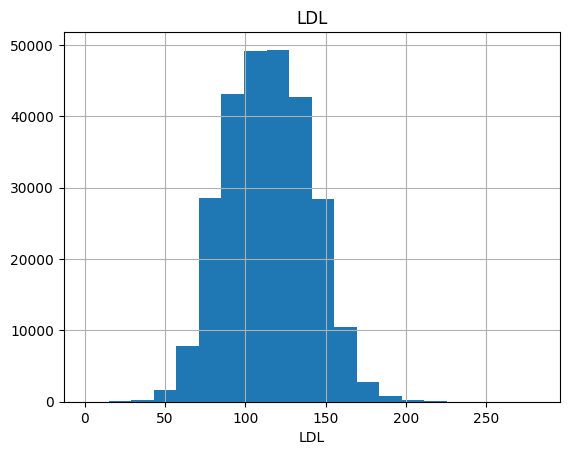

count    265427.000000
mean         14.795533
std           1.432364
min           5.800000
5%           12.400000
10%          12.900000
20%          13.500000
30%          14.100000
40%          14.600000
50%          15.000000
60%          15.300000
70%          15.700000
80%          16.000000
90%          16.500000
95%          16.800000
99%          17.600000
max          21.100000
Name: hemoglobin, dtype: float64


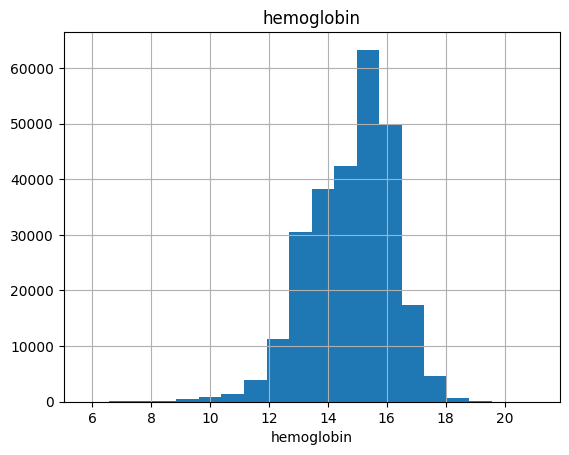

count    265427.000000
mean          0.892479
std           0.176060
min           0.100000
5%            0.600000
10%           0.700000
20%           0.700000
30%           0.800000
40%           0.900000
50%           0.900000
60%           0.900000
70%           1.000000
80%           1.000000
90%           1.100000
95%           1.200000
99%           1.300000
max           2.100000
Name: serum creatinine, dtype: float64


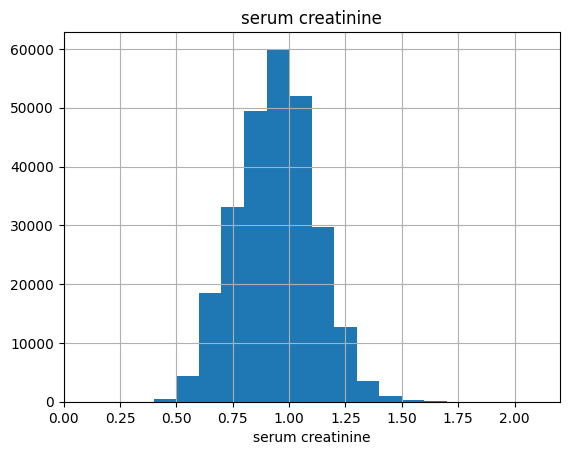

count    265427.000000
mean         25.473083
std           8.387380
min           6.000000
5%           16.000000
10%          17.000000
20%          19.000000
30%          21.000000
40%          22.000000
50%          24.000000
60%          25.000000
70%          28.000000
80%          31.000000
90%          36.000000
95%          41.000000
99%          54.000000
max          78.500000
Name: AST, dtype: float64


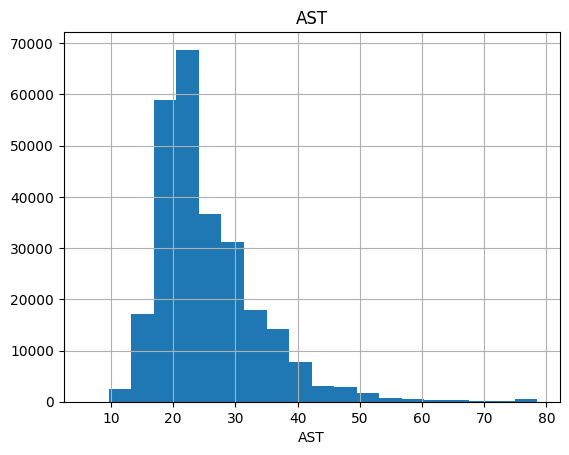

count    265427.000000
mean         26.472190
std          14.927725
min           1.000000
5%           11.000000
10%          13.000000
20%          15.000000
30%          17.000000
40%          20.000000
50%          22.000000
60%          26.000000
70%          30.000000
80%          36.000000
90%          46.000000
95%          55.000000
99%          81.000000
max         121.000000
Name: ALT, dtype: float64


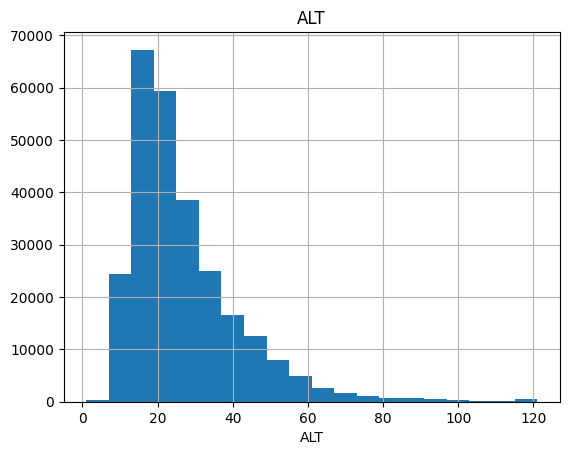

count    265427.000000
mean         35.789639
std          27.337904
min           2.000000
5%           12.000000
10%          14.000000
20%          17.000000
30%          20.000000
40%          23.000000
50%          27.000000
60%          33.000000
70%          39.000000
80%          50.000000
90%          66.000000
95%          87.000000
99%         152.000000
max         199.500000
Name: Gtp, dtype: float64


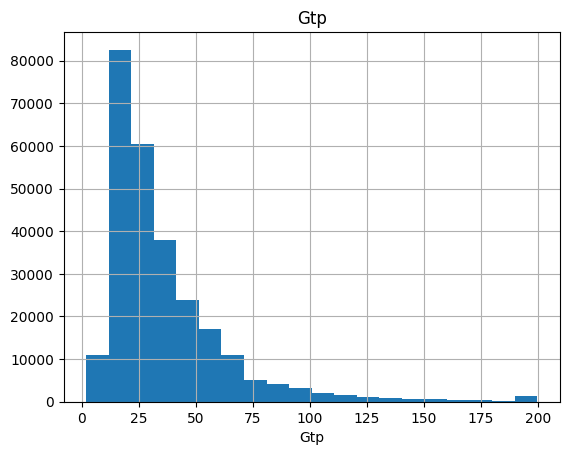

In [22]:
for col in num_cols:
    num_summary(df,col,plot=True)

<Figure size 1000x600 with 0 Axes>

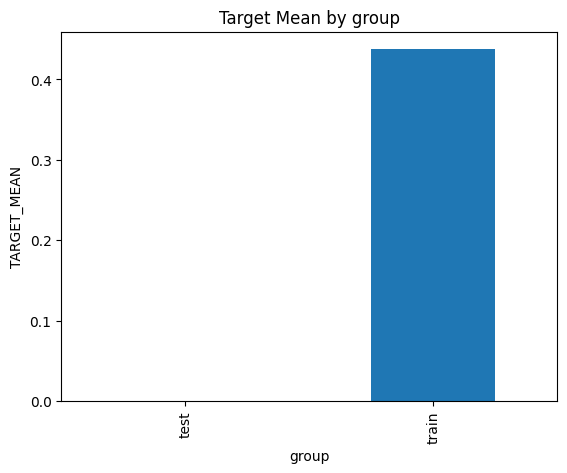

<Figure size 1000x600 with 0 Axes>

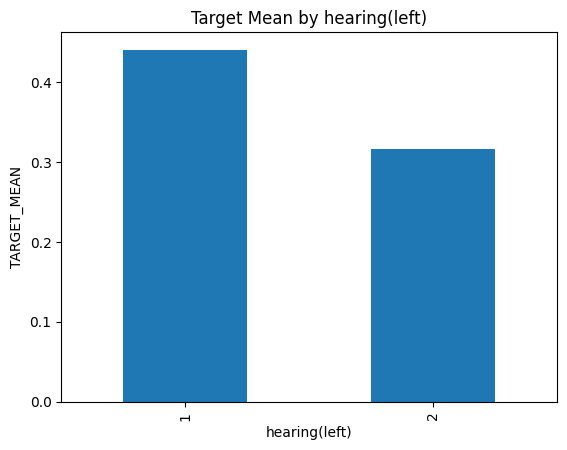

<Figure size 1000x600 with 0 Axes>

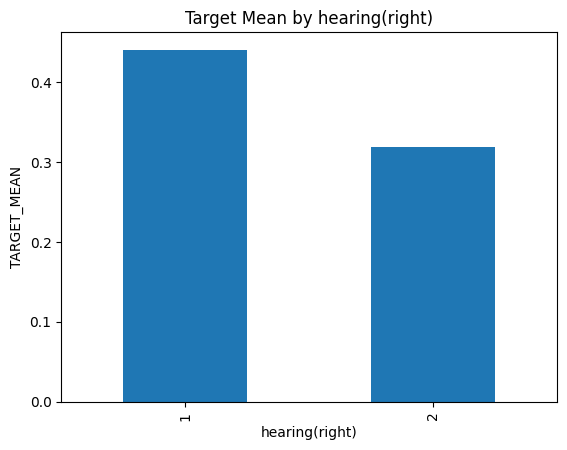

<Figure size 1000x600 with 0 Axes>

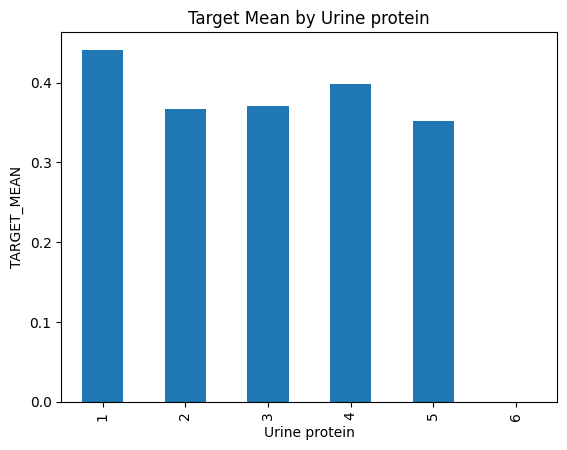

<Figure size 1000x600 with 0 Axes>

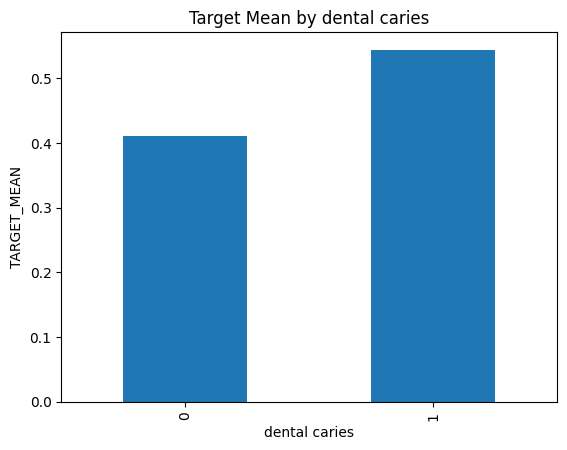

<Figure size 1000x600 with 0 Axes>

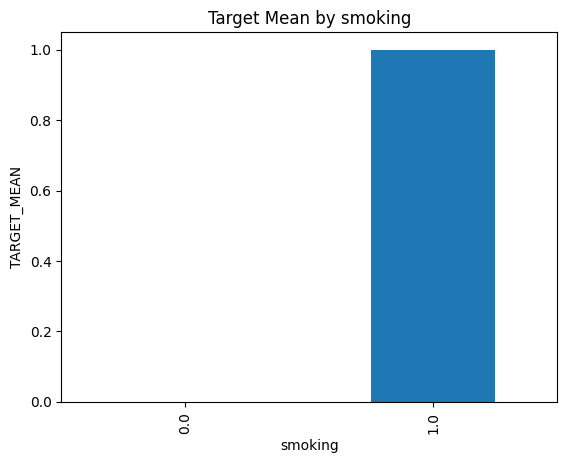

In [23]:
def target_summary_with_cat(dataframe, target, categorical_col):
    # Calculate target mean
    target_mean_df = pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()})
    
    # Plotting
    plt.figure(figsize=(10, 6))
    target_mean_df.plot(kind='bar', legend=None)
    
    # Add labels and title
    plt.xlabel(categorical_col)
    plt.ylabel("TARGET_MEAN")
    plt.title(f"Target Mean by {categorical_col}")
    
    # Show the plot
    plt.show()

for col in cat_cols:
    target_summary_with_cat(df, "smoking", col)

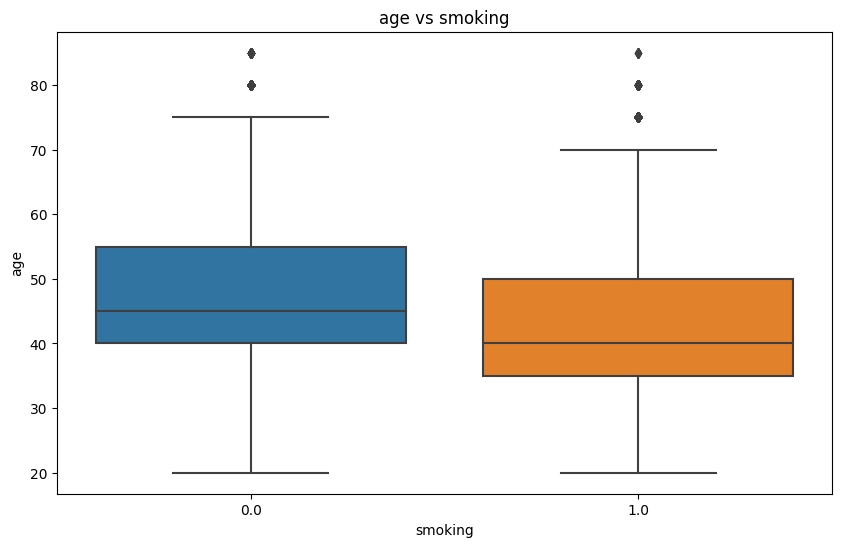

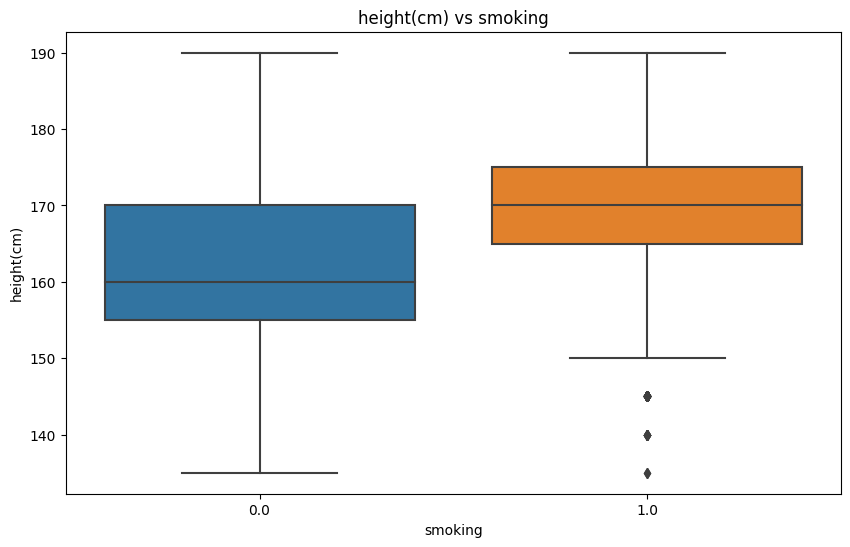

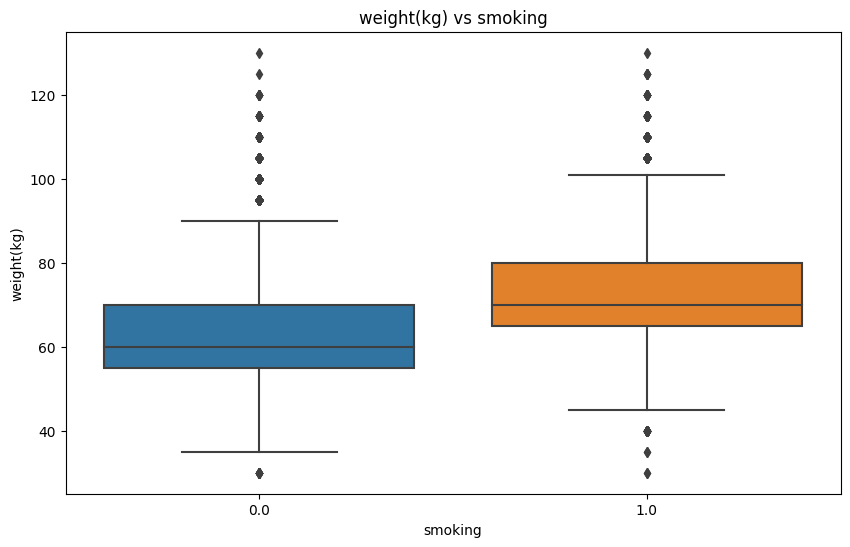

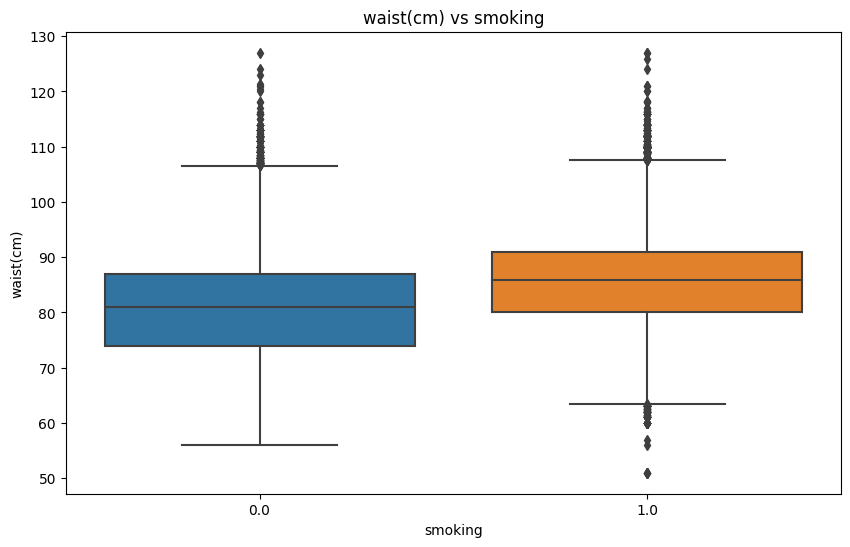

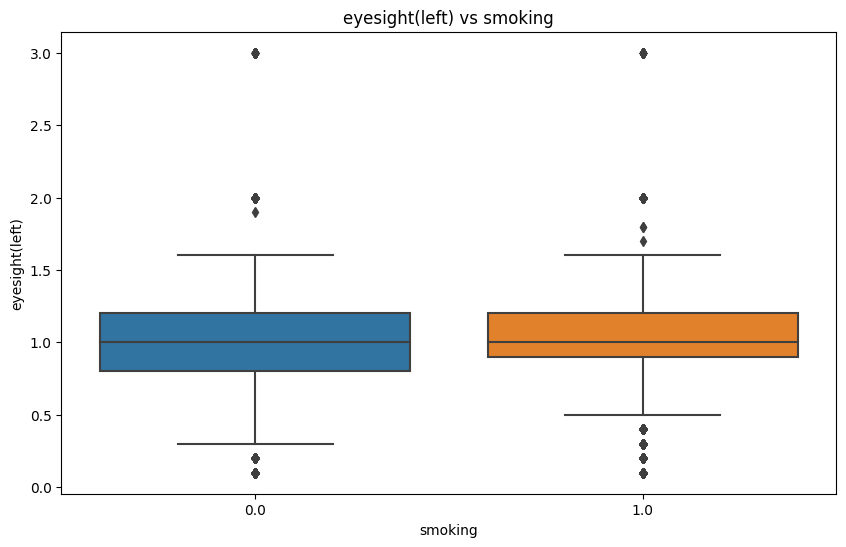

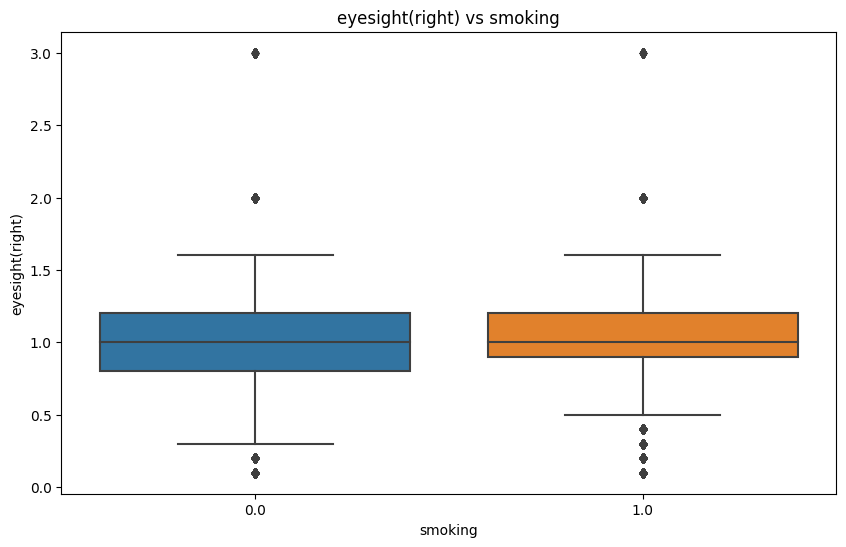

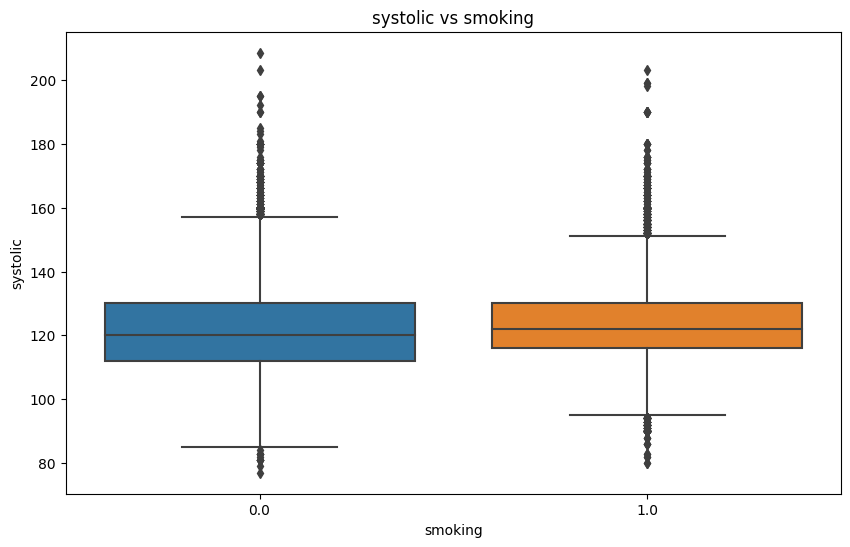

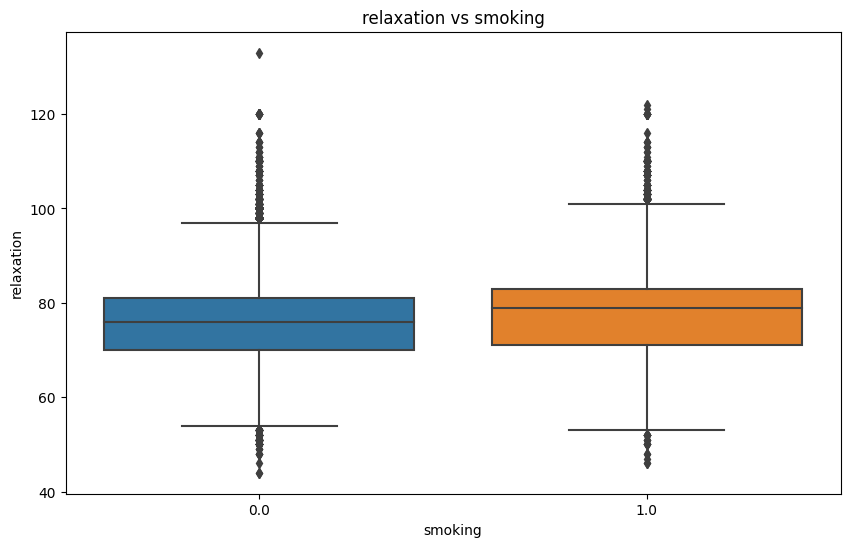

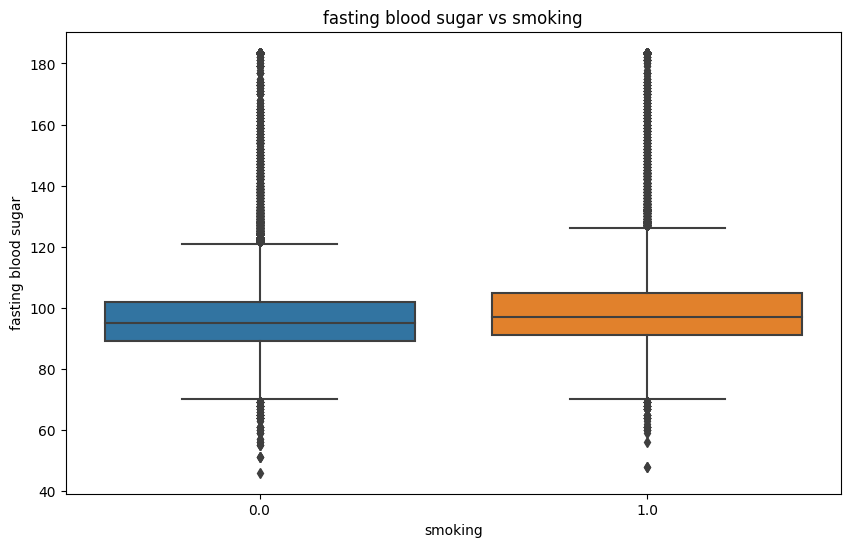

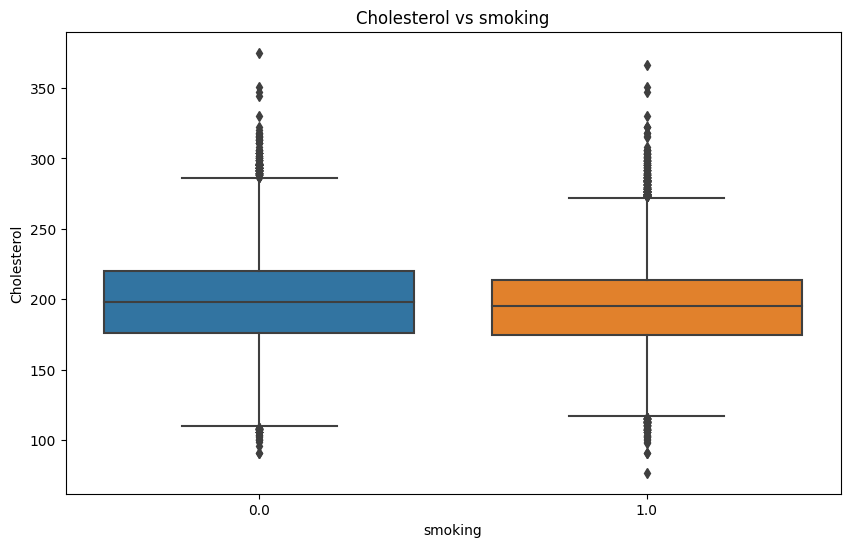

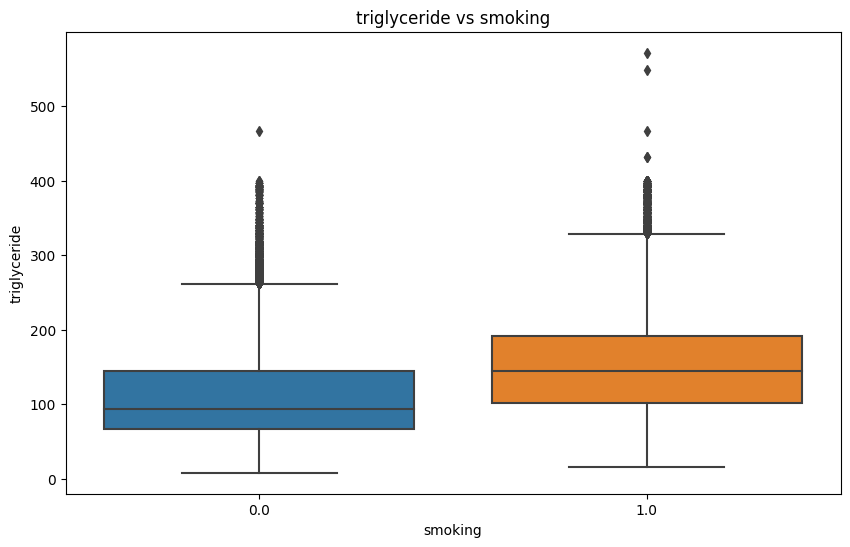

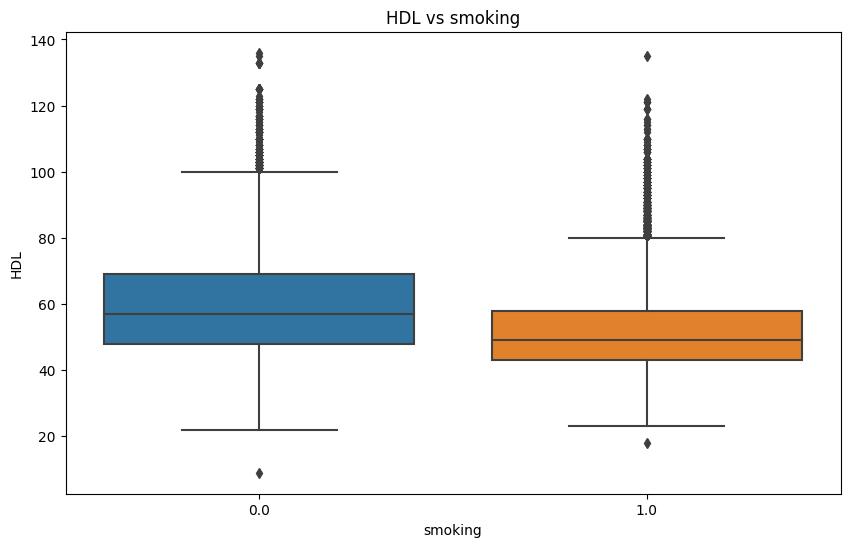

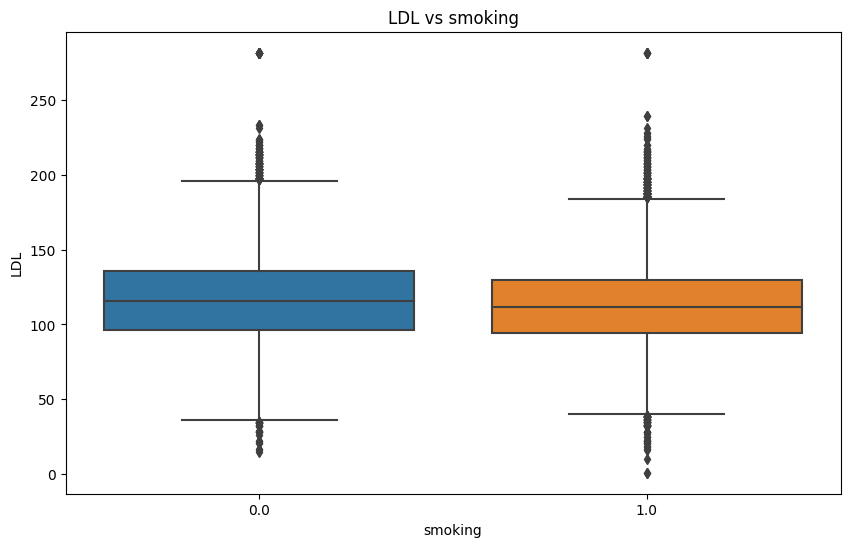

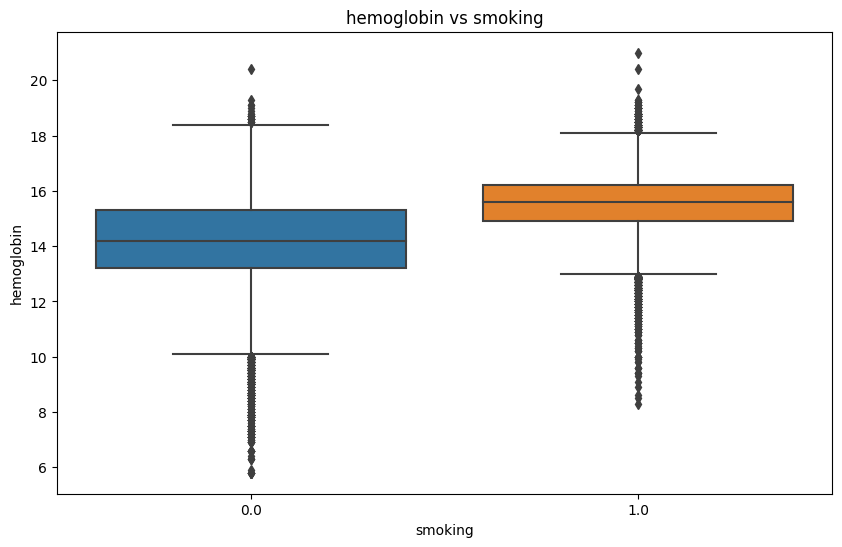

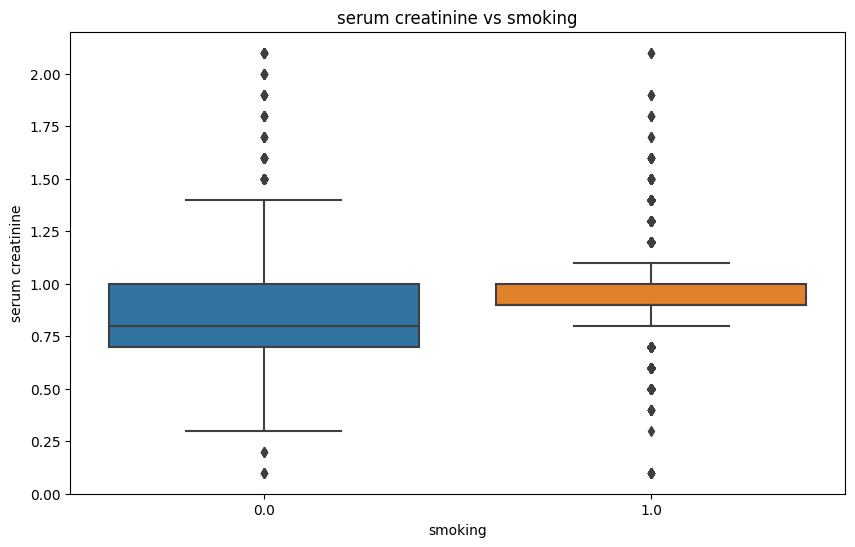

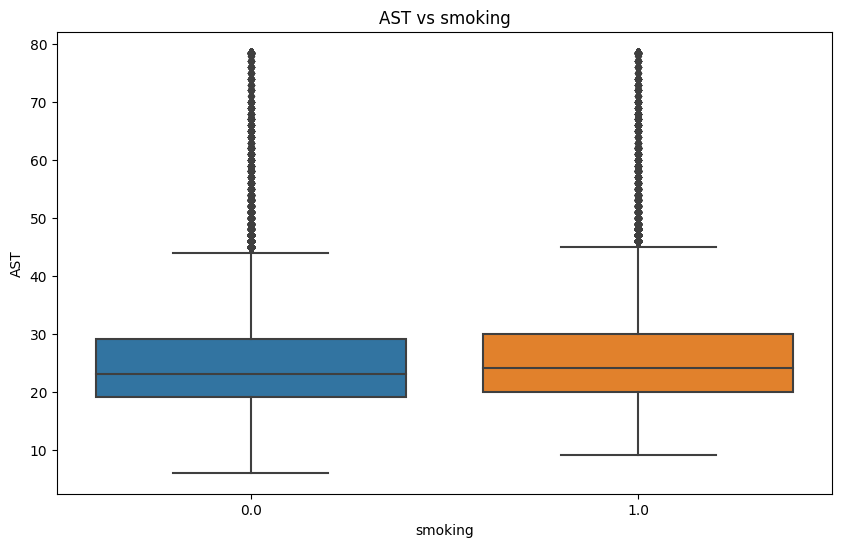

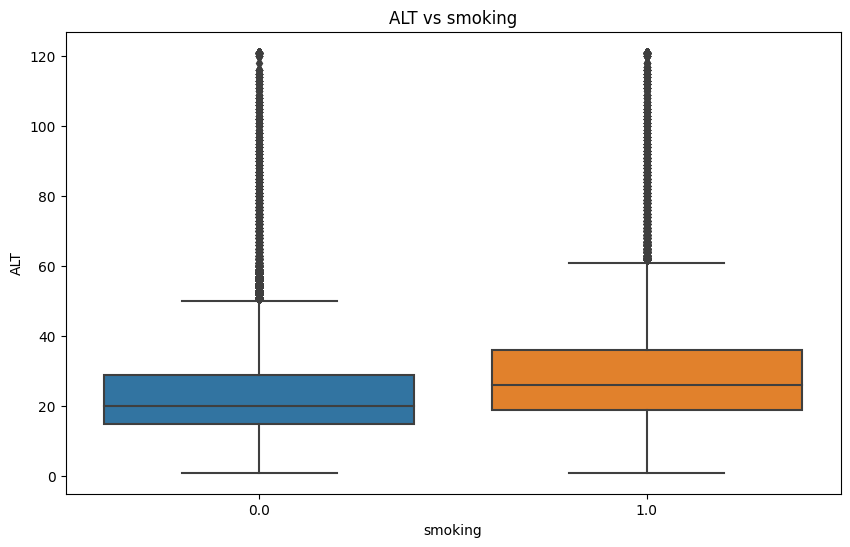

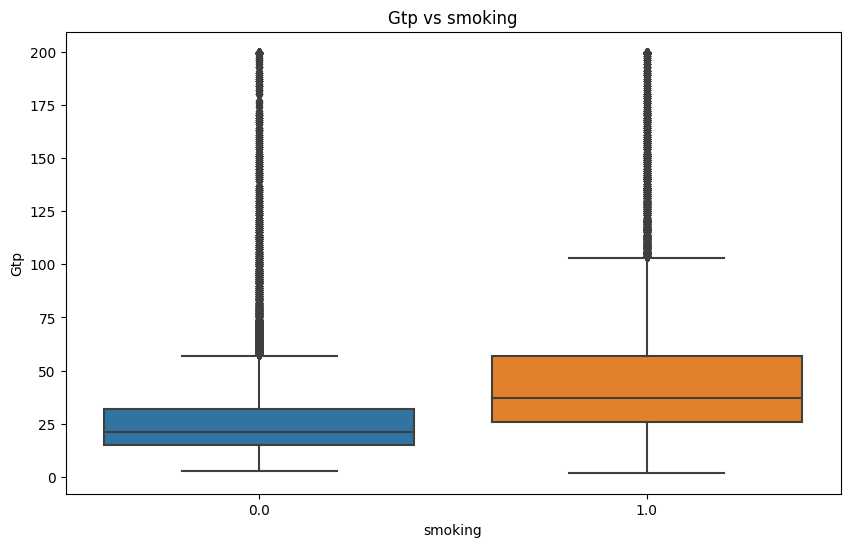

In [24]:
def target_summary_with_num(dataframe, target, numerical_column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target, y=numerical_column, data=dataframe)
    plt.title(f'{numerical_column} vs {target}')
    plt.show()


for col in num_cols:
    target_summary_with_num(df, 'smoking', col)

In [25]:
train

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [26]:
train = df[df["group"] == "train"].drop("group", axis=1)
test = df[df["group"] == "test"].drop(["group", "smoking"], axis=1)

In [27]:
train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135.0,87,...,40,75.0,16.5,1,1.0,22.0,25,27.0,0,1.0
1,70,165,65,89.0,0.6,0.7,2,2,146.0,83,...,57,126.0,16.2,1,1.1,27.0,23,37.0,1,0.0
2,20,170,75,81.0,0.4,0.5,1,1,118.0,75,...,45,93.0,17.4,1,0.8,27.0,31,53.0,0,1.0
3,35,180,95,105.0,1.5,1.2,1,1,131.0,88,...,38,102.0,15.9,1,1.0,20.0,27,30.0,1,0.0
4,30,165,60,80.5,1.5,1.0,1,1,121.0,76,...,44,93.0,15.4,1,0.8,19.0,13,17.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127.0,80,...,72,159.0,14.5,1,0.8,25.0,26,13.0,0,0.0
159252,50,155,75,82.0,1.0,1.0,1,1,120.0,80,...,64,108.0,14.5,1,0.6,21.0,20,18.0,0,0.0
159253,40,160,50,66.0,1.5,1.0,1,1,114.0,70,...,87,93.0,10.9,1,0.6,15.0,9,12.0,0,0.0
159254,50,165,75,92.0,1.2,1.0,1,1,121.0,90,...,55,80.0,14.4,1,1.1,22.0,17,37.0,0,1.0


In [28]:
train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [29]:
cor_matrix = train.corr().abs()

In [30]:
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]>0.90) ]

In [31]:
drop_list

[]

In [32]:
cor_target = abs(cor_matrix["smoking"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

age                 0.206033
height(cm)          0.447111
weight(kg)          0.351748
waist(cm)           0.262715
eyesight(left)      0.132166
eyesight(right)     0.141353
relaxation          0.109501
triglyceride        0.332004
HDL                 0.271186
hemoglobin          0.450687
serum creatinine    0.278564
ALT                 0.190917
Gtp                 0.338607
dental caries       0.106636
smoking             1.000000
Name: smoking, dtype: float64

In [33]:
to_drop = cor_target[cor_target<0.1]
to_drop

hearing(left)          0.038219
hearing(right)         0.036858
systolic               0.058645
fasting blood sugar    0.099710
Cholesterol            0.051894
LDL                    0.077167
Urine protein          0.028548
AST                    0.065230
Name: smoking, dtype: float64

uçurulacak değişkenler bulundu.
hearing(left)          0.038219
hearing(right)         0.036858
systolic               0.058645
fasting blood sugar    0.099710
Cholesterol            0.051894
LDL                    0.077167
Urine protein          0.028548
AST                    0.065230

In [34]:
columns_to_dropp = ['hearing(left)','hearing(right)','systolic','fasting blood sugar','Cholesterol','LDL','Urine protein','AST']
train = train.drop(columns=columns_to_dropp)

In [35]:
train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),relaxation,triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,87,300.0,40,16.5,1.0,25,27.0,0,1.0
1,70,165,65,89.0,0.6,0.7,83,55.0,57,16.2,1.1,23,37.0,1,0.0
2,20,170,75,81.0,0.4,0.5,75,197.0,45,17.4,0.8,31,53.0,0,1.0
3,35,180,95,105.0,1.5,1.2,88,203.0,38,15.9,1.0,27,30.0,1,0.0
4,30,165,60,80.5,1.5,1.0,76,87.0,44,15.4,0.8,13,17.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,80,47.0,72,14.5,0.8,26,13.0,0,0.0
159252,50,155,75,82.0,1.0,1.0,80,202.0,64,14.5,0.6,20,18.0,0,0.0
159253,40,160,50,66.0,1.5,1.0,70,45.0,87,10.9,0.6,9,12.0,0,0.0
159254,50,165,75,92.0,1.2,1.0,90,148.0,55,14.4,1.1,17,37.0,0,1.0


In [36]:
columns_to_dropp = ['hearing(left)','hearing(right)','systolic','fasting blood sugar','Cholesterol','LDL','Urine protein','AST']
test = test.drop(columns=columns_to_dropp)

In [37]:
test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),relaxation,triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp,dental caries
159256,40,165,70,84.0,1.2,1.2,89,186.0,49,14.2,0.9,25,32.0,0
159257,80,160,60,93.0,1.0,1.0,72,158.0,35,13.0,1.1,12,24.0,0
159258,60,170,70,86.5,0.6,0.7,75,173.0,39,15.4,1.4,60,36.0,0
159259,40,160,50,67.0,0.3,0.4,62,47.0,75,14.5,0.6,18,10.0,1
159260,40,170,75,89.4,1.0,0.9,94,100.0,39,16.5,1.0,39,27.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265422,40,165,60,78.0,0.8,0.9,78,82.0,59,16.4,1.1,31,28.0,0
265423,40,170,85,95.0,1.2,1.2,90,186.0,44,16.0,1.0,31,38.0,0
265424,35,170,85,89.0,1.2,1.2,86,76.0,53,15.9,0.8,32,24.0,1
265425,40,160,60,67.0,0.7,0.8,80,81.0,55,13.9,0.6,36,32.0,0


In [38]:
from sklearn.preprocessing import MinMaxScaler

min = MinMaxScaler()


train["age"] = min.fit_transform(train["age"].values.reshape(-1, 1))
train["height(cm)"] = min.fit_transform(train["height(cm)"].values.reshape(-1, 1))
train["weight(kg)"] = min.fit_transform(train["weight(kg)"].values.reshape(-1, 1))
train["waist(cm)"] = min.fit_transform(train["waist(cm)"].values.reshape(-1, 1))
train["eyesight(left)"] = min.fit_transform(train["eyesight(left)"].values.reshape(-1, 1))
train["eyesight(right)"] = min.fit_transform(train["eyesight(right)"].values.reshape(-1, 1))
train["relaxation"] = min.fit_transform(train["relaxation"].values.reshape(-1, 1))
train["triglyceride"] = min.fit_transform(train["triglyceride"].values.reshape(-1, 1))
train["HDL"] = min.fit_transform(train["HDL"].values.reshape(-1, 1))
train["hemoglobin"] = min.fit_transform(train["hemoglobin"].values.reshape(-1, 1))
train["serum creatinine"] = min.fit_transform(train["serum creatinine"].values.reshape(-1, 1))
train["ALT"] = min.fit_transform(train["ALT"].values.reshape(-1, 1))
train["Gtp"] = min.fit_transform(train["Gtp"].values.reshape(-1, 1))
train["dental caries"] = min.fit_transform(train["dental caries"].values.reshape(-1, 1))


test["age"] = min.fit_transform(test["age"].values.reshape(-1, 1))
test["height(cm)"] = min.fit_transform(test["height(cm)"].values.reshape(-1, 1))
test["weight(kg)"] = min.fit_transform(test["weight(kg)"].values.reshape(-1, 1))
test["waist(cm)"] = min.fit_transform(test["waist(cm)"].values.reshape(-1, 1))
test["eyesight(left)"] = min.fit_transform(test["eyesight(left)"].values.reshape(-1, 1))
test["eyesight(right)"] = min.fit_transform(test["eyesight(right)"].values.reshape(-1, 1))
test["relaxation"] = min.fit_transform(test["relaxation"].values.reshape(-1, 1))
test["triglyceride"] = min.fit_transform(test["triglyceride"].values.reshape(-1, 1))
test["HDL"] = min.fit_transform(test["HDL"].values.reshape(-1, 1))
test["hemoglobin"] = min.fit_transform(test["hemoglobin"].values.reshape(-1, 1))
test["serum creatinine"] = min.fit_transform(test["serum creatinine"].values.reshape(-1, 1))
test["ALT"] = min.fit_transform(test["ALT"].values.reshape(-1, 1))
test["Gtp"] = min.fit_transform(test["Gtp"].values.reshape(-1, 1))
test["dental caries"] = min.fit_transform(test["dental caries"].values.reshape(-1, 1))





In [39]:
test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),relaxation,triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp,dental caries
159256,0.307692,0.545455,0.40,0.430248,0.379310,0.379310,0.510417,0.329630,0.238462,0.549020,0.40,0.200000,0.151899,0.0
159257,0.923077,0.454545,0.30,0.547588,0.310345,0.310345,0.333333,0.277778,0.130769,0.470588,0.50,0.091667,0.111392,0.0
159258,0.615385,0.636364,0.40,0.462842,0.172414,0.206897,0.364583,0.305556,0.161538,0.627451,0.65,0.491667,0.172152,0.0
159259,0.307692,0.454545,0.20,0.208605,0.068966,0.103448,0.229167,0.072222,0.438462,0.568627,0.25,0.141667,0.040506,1.0
159260,0.307692,0.636364,0.45,0.500652,0.310345,0.275862,0.562500,0.170370,0.161538,0.699346,0.45,0.316667,0.126582,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265422,0.307692,0.545455,0.30,0.352021,0.241379,0.275862,0.395833,0.137037,0.315385,0.692810,0.50,0.250000,0.131646,0.0
265423,0.307692,0.636364,0.55,0.573664,0.379310,0.379310,0.520833,0.329630,0.200000,0.666667,0.45,0.250000,0.182278,0.0
265424,0.230769,0.636364,0.55,0.495437,0.379310,0.379310,0.479167,0.125926,0.269231,0.660131,0.35,0.258333,0.111392,1.0
265425,0.307692,0.454545,0.30,0.208605,0.206897,0.241379,0.416667,0.135185,0.284615,0.529412,0.25,0.291667,0.151899,0.0


In [40]:
train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),relaxation,triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp,dental caries,smoking
0,0.538462,0.545455,0.30,0.394737,0.137931,0.172414,0.483146,0.518190,0.244094,0.703947,0.45,0.200000,0.126582,0.0,1.0
1,0.769231,0.545455,0.35,0.500000,0.172414,0.206897,0.438202,0.083407,0.377953,0.684211,0.50,0.183333,0.177215,1.0,0.0
2,0.000000,0.636364,0.45,0.394737,0.103448,0.137931,0.348315,0.335404,0.283465,0.763158,0.35,0.250000,0.258228,0.0,1.0
3,0.230769,0.818182,0.65,0.710526,0.482759,0.379310,0.494382,0.346051,0.228346,0.664474,0.45,0.216667,0.141772,1.0,0.0
4,0.153846,0.545455,0.30,0.388158,0.482759,0.310345,0.359551,0.140195,0.275591,0.631579,0.35,0.100000,0.075949,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,0.307692,0.363636,0.15,0.236842,0.482759,0.655172,0.404494,0.069210,0.496063,0.572368,0.35,0.208333,0.055696,0.0,0.0
159252,0.461538,0.363636,0.45,0.407895,0.310345,0.310345,0.404494,0.344277,0.433071,0.572368,0.25,0.158333,0.081013,0.0,0.0
159253,0.307692,0.454545,0.20,0.197368,0.482759,0.310345,0.292135,0.065661,0.614173,0.335526,0.25,0.066667,0.050633,0.0,0.0
159254,0.461538,0.545455,0.45,0.539474,0.379310,0.310345,0.516854,0.248447,0.362205,0.565789,0.50,0.133333,0.177215,0.0,1.0


In [41]:
X = train.drop("smoking", axis=1)
y = train["smoking"]

In [42]:
from lightgbm import LGBMClassifier

In [43]:
lgbm_model = LGBMClassifier(random_state=17)

In [44]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [45]:
cv_results = cross_validate(lgbm_model, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])

In [46]:
cv_results['test_accuracy'].mean()

0.7761277466731008

In [47]:
cv_results['test_f1'].mean()

0.7597527041011697

In [48]:
cv_results['test_roc_auc'].mean()

0.8598489729279892

In [49]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [100, 300],
               "colsample_bytree": [0.5, 1]}

In [50]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=3, n_jobs=-1, verbose=True).fit(X, y)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [51]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [52]:
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [53]:
cv_results['test_accuracy'].mean()

0.7776598707580218

In [54]:
cv_results['test_f1'].mean()

0.7601606119415807

In [55]:
cv_results['test_roc_auc'].mean()

0.8627610455898289

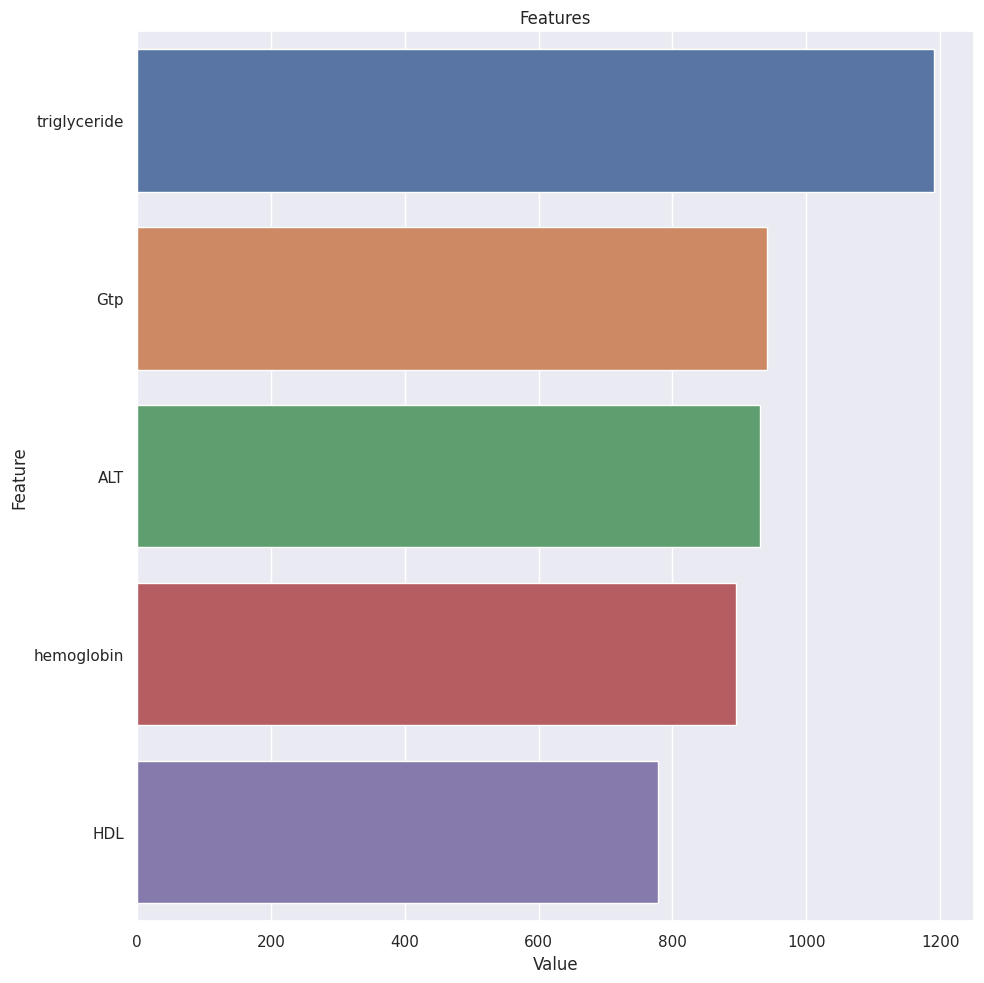

In [56]:
def plot_importance(model, features, num=len(X), save=False):
    features_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=features_imp.sort_values(by="Value", ascending=False)[0:5])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importance.png")


plot_importance(lgbm_final, X)